# ■ 필기체 데이터를 신경망에 로드하기

mnist 데이터를 숫자 0~9까지의 숫자 이미지로 구성되어있고 훈련 데이터가 6만장,
테스트 데이터가 1만장으로 준비되어있습니다.

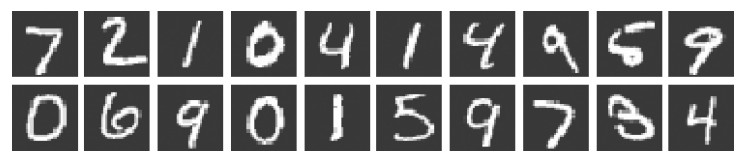

mnist 이미지 데이터를 28x28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0~255 까지의 값을 취한다.

In [2]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)


설명: load_mnist 함수는 필기체 데이터를 불러오는 함수  
	normalize : 이미지의 픽셀값을 0.0 ~ 1.0 사이의 값으로 정규화 할지를 정한다.  
flatten : 입력이미지를 1차원 배열로 만들지를 정한다.


                       테스트 데이터  테스트 데이터의 정답
                               ↓      ↓
        (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
           ↑         ↑
        훈련데이터  훈련데이터의 정답

## 문제51. 테스트 데이터는 몇장이 있는지 확인하시오 !

In [3]:
print(x_test.shape)

(10000, 784)


## 문제52. 훈련 데이터의 첫번째 필기체의 숫자가 무엇인지 정답을 출력해서 알아내시오

In [7]:
print(t_train[0])

5


## 문제53. 훈련 데이터의 첫번째 필기체 데이터를 2차원으로 해서 시각화 하시오!

아나콘다 프롬프트 창을 열고 Pillow 모듈을 설치하세요 ~  

    있는지 확인:  
    pip list Pillow

    설치:  
    pip install Pillow

In [12]:
from PIL import Image
import numpy as np

img = x_train[0]
print(img.shape)   # (784,) : 1차원 배열로 출력됨

img = img.reshape(28,28)  # 2차원으로 reshape 합니다.
print(img.shape)   # (28, 28)

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img_show(img)   # 5

(784,)
(28, 28)


In [14]:
# 두번째 데이터
from PIL import Image
import numpy as np

img = x_train[1]
img = img.reshape(28,28)  

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img_show(img)   # 0

(784,)
(28, 28)


## 문제54. mnist 데이터를 flatten 시키지 말고 출력하시오 !

In [15]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)

print(x_train.shape)

(60000, 1, 28, 28)


    (60000,  1,  28,  28)
       ↑    ↑   ↑  ↑
    전체장수 색조 가로 세로

## 문제55. 원하는 사진을 파이썬에서 시각화 하시오 !

(320, 320, 3)


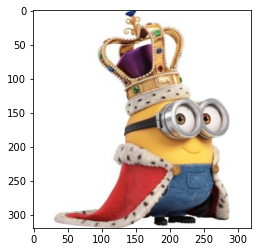

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('c:\\data\\king_bob.jpeg')
img_pixel = np.array(img)  # 이미지를 numpy array 로 변환합니다.
plt.imshow(img_pixel)  # 이미지 시각화
print(img_pixel.shape)  # (320, 320, 3) : 가로, 세로, 색조(Red, Green, Blue)

## 문제56. 사진에서 red 부분의 행렬을 취하고 red 부분만 이미지로 시각화 하시오 !

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


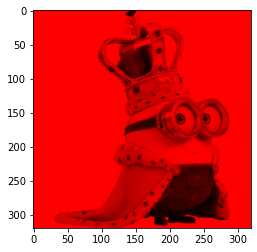

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('c:\\data\\king_bob.jpeg')
img_pixel = np.array(img)  # 이미지를 numpy array 로 변환합니다.
print(img_pixel[:, :, 0])  # red 부분 행렬만 출력하겠다
img_pixel[:, :, 1] = 0  # green 부분을 전부 0으로 변경
img_pixel[:, :, 2] = 0  # blue 부분을 전부 0으로 변경
plt.imshow(img_pixel)  # 이미지 시각화
plt.show()

## 문제57. 사진에서 green 부분만 시각화 하시오

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


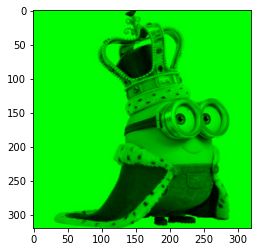

In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('c:\\data\\king_bob.jpeg')
img_pixel = np.array(img)  # 이미지를 numpy array 로 변환합니다.
print(img_pixel[:, :, 1])  # green 부분 행렬만 출력하겠다
img_pixel[:, :, 0] = 0  # red 부분을 전부 0으로 변경
img_pixel[:, :, 2] = 0  # blue 부분을 전부 0으로 변경
plt.imshow(img_pixel)  # 이미지 시각화
plt.show()

## 문제58. 사진에서 blue 부분만 시각화 하시오

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


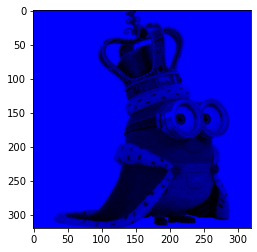

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('c:\\data\\king_bob.jpeg')
img_pixel = np.array(img)  # 이미지를 numpy array 로 변환합니다.
print(img_pixel[:, :, 2])  # blue 부분 행렬만 출력하겠
img_pixel[:, :, 0] = 0  # red 부분을 전부 0으로 변경
img_pixel[:, :, 1] = 0  # green 부분을 전부 0으로 변경
plt.imshow(img_pixel)  # 이미지 시각화
plt.show()